# **Machine Learning**

## **Regresion lineal**

In [ ]:
import numpy as np                  #importamos la biblioteca
import matplotlib.pyplot as plt     #importamos la biblioteca
from sklearn.linear_model import LinearRegression #importamos la biblioteca

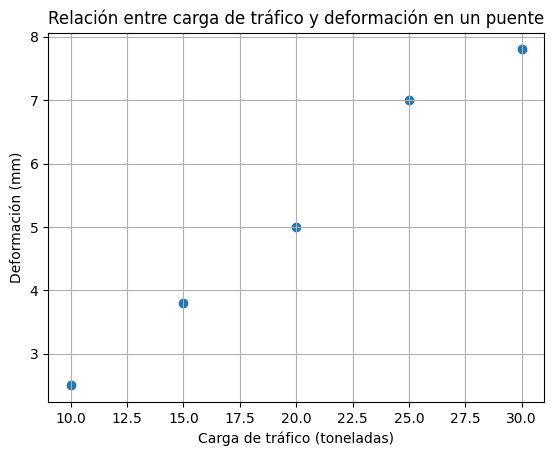

In [ ]:
# Datos (Carga de tráfico en toneladas y deformación en mm)
carga_trafico = np.array([10, 25, 15, 30, 20]).reshape(-1, 1)  # Carga en toneladas
deformacion = np.array([2.5, 7.0, 3.8, 7.8, 5.0])  # Deformación en mm
# Graficar los datos
plt.scatter(carga_trafico, deformacion)
plt.xlabel("Carga de tráfico (toneladas)")
plt.ylabel("Deformación (mm)")
plt.title("Relación entre carga de tráfico y deformación en un puente")
plt.grid()
plt.show()

la deformación para una carga de 30 toneladas es:  [7.98]


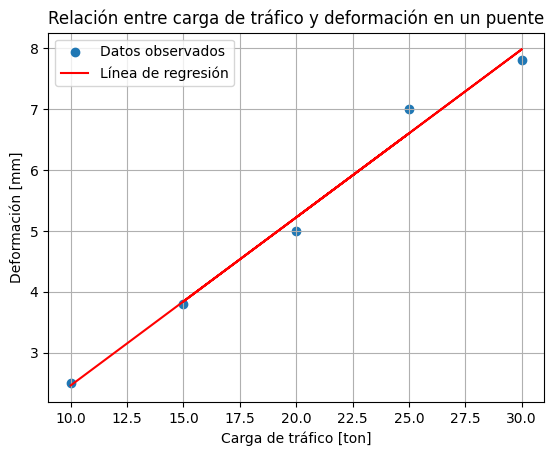

In [ ]:
# Ajustar la regresión lineal
model = LinearRegression()
model.fit(carga_trafico, deformacion)

# Predicción de deformación para los valores de carga de tráfico
def_pred_esp = model.predict([[30]])
print("la deformación para una carga de 30 toneladas es: ", def_pred_esp)


def_pred_total = model.predict(carga_trafico)
# Graficar los datos y la línea de regresión
plt.scatter(carga_trafico, deformacion, label="Datos observados")
plt.plot(carga_trafico, def_pred_total, color="r", label="Línea de regresión")
plt.xlabel("Carga de tráfico [ton]")
plt.ylabel("Deformación [mm]")
plt.title("Relación entre carga de tráfico y deformación en un puente")
plt.grid()
plt.legend()
plt.show()

# **Regresión polinómica**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

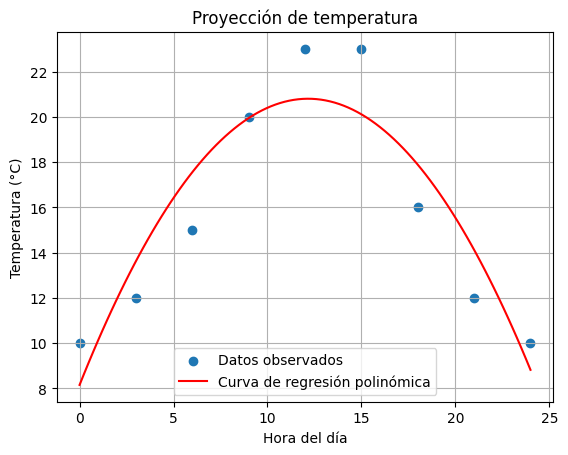

In [ ]:
# Datos de horas del día (desde las 12 AM hasta las 11 PM) y temperatura (°C)
horas = np.array([0, 3, 6, 9, 12, 15, 18, 21, 24]).reshape(-1, 1)  # Más puntos durante el día
temperatura = np.array([10, 12, 15, 20, 23, 23, 16, 12, 10])  # Temperaturas más detalladas

# Crear características polinómicas (grado 2) y ajustar la regresión polinómica
poly = PolynomialFeatures(degree=2, include_bias=False)
horas_poly = poly.fit_transform(horas)
model = LinearRegression().fit(horas_poly, temperatura)


# Proyección para un día completo (24 horas)
horas_pred = np.linspace(0, 24, 100).reshape(-1, 1)
horas_pred_poly = poly.transform(horas_pred)
temperatura_pred = model.predict(horas_pred_poly)





# Graficar los datos y la curva de regresión polinómica
plt.scatter(horas, temperatura, label="Datos observados")
plt.plot(horas_pred, temperatura_pred, color="r", label="Curva de regresión polinómica")
plt.xlabel("Hora del día")
plt.ylabel("Temperatura (°C)")
plt.title("Proyección de temperatura")
plt.grid()
plt.legend()
plt.show()

# **Ejercicio Aplicado**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

Text(0, 0.5, 'Cantidad de hurtos')

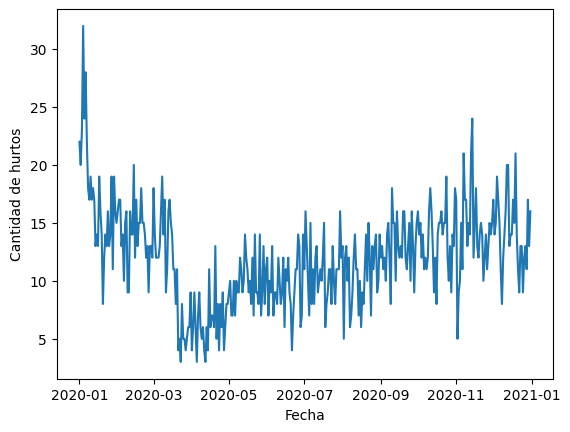

In [ ]:
hurtos = pd.read_json('https://www.datos.gov.co/resource/4rxi-8m8d.json?$limit=1000000')
hurtos['fecha_hecho'] = pd.to_datetime(hurtos['fecha_hecho'])
hurtos_2020_antioquia = hurtos.query("fecha_hecho >= '2020-01-01'and fecha_hecho <= '2020-12-31'and departamento == 'ANTIOQUIA'").sort_values("fecha_hecho")
hurtos_por_dia_2020 = hurtos_2020_antioquia.groupby(pd.Grouper(key='fecha_hecho', freq='D')).size().reset_index(name='cantidad')
plt.plot(hurtos_por_dia_2020["fecha_hecho"],hurtos_por_dia_2020["cantidad"])
plt.xlabel("Fecha")
plt.ylabel("Cantidad de hurtos")

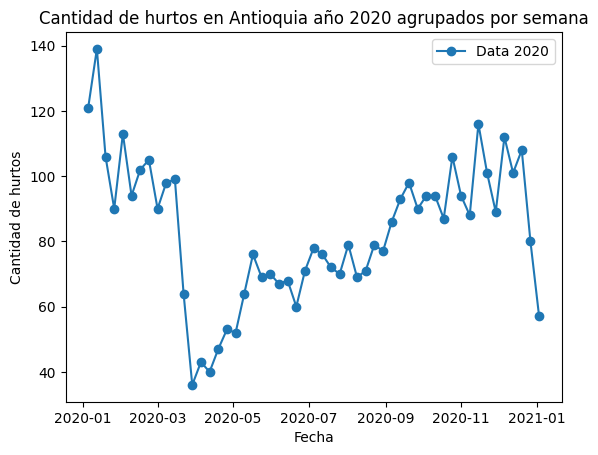

In [ ]:
# Agrupar los hurtos por semana usando resample
hurtos_por_semana_2020 = hurtos_por_dia_2020.resample('W', on='fecha_hecho').sum()
plt.plot(hurtos_por_semana_2020.index, hurtos_por_semana_2020["cantidad"], marker='o', label="Data 2020")
plt.title("Cantidad de hurtos en Antioquia año 2020 agrupados por semana")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de hurtos")
plt.legend()
plt.show()

**IMPLEMENTACIÓN DE MODELO MACHINE**

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

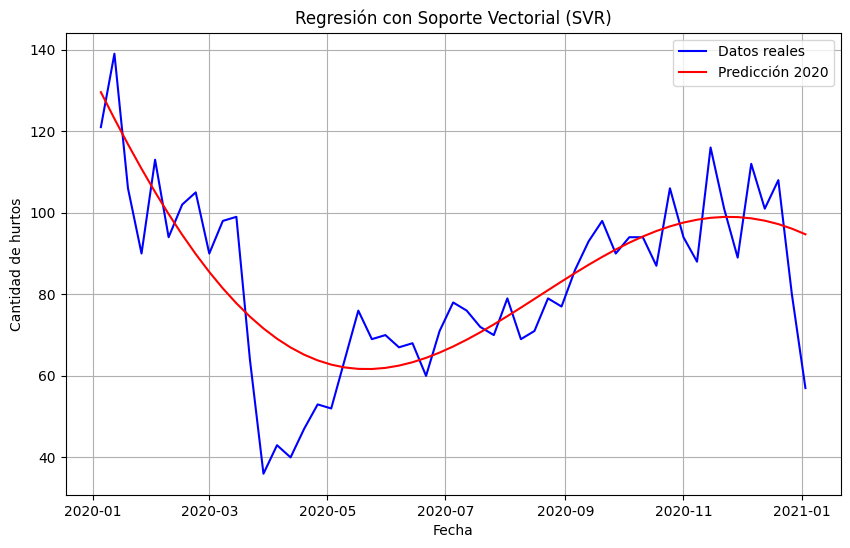

In [ ]:
hurtos_por_semana_2020 = hurtos_por_semana_2020.reset_index()
# Convertir las fechas a números ordinales para que el modelo pueda procesarlas
X = hurtos_por_semana_2020["fecha_hecho"].map(lambda date: date.toordinal()).values.reshape(-1, 1)
y = hurtos_por_semana_2020["cantidad"].values  # Asegurar que y es unidimensional

# Escalar los datos (esto es importante para SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)  # Escalar X
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()  # Escalar y y luego aplanarlo

# Crear el modelo de SVR con un kernel radial (RBF)
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.5)
svr_model.fit(X_scaled, y_scaled) #EL MAS IMPORTANTE, ENTRENA EL MODELO

# Predecir usando el modelo
y_pred_scaled = svr_model.predict(X_scaled)

# Desescalar las predicciones para que estén en el mismo rango que los datos originales
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(hurtos_por_semana_2020["fecha_hecho"], y, color='blue', label='Datos reales 2020')
plt.plot(hurtos_por_semana_2020["fecha_hecho"], y_pred, color='red', label='Predicción 2020')
plt.title('Regresión con Soporte Vectorial (SVR)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de hurtos')
plt.legend()
plt.grid(True)
plt.show()


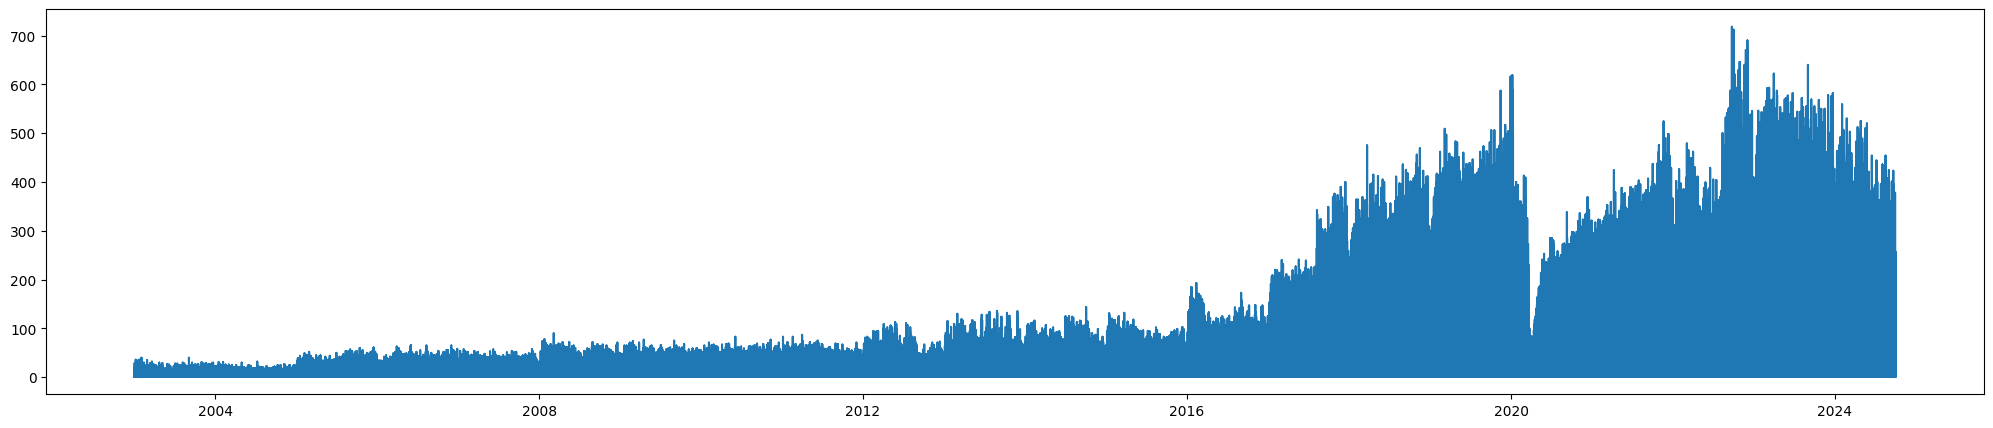

In [ ]:
plt.figure(figsize=(25, 5))                           #Indica el tamaño de la figura
plt.plot(hurtos["fecha_hecho"],hurtos["cantidad"])    #Grafica fecha del hurto en el eje X y cantidad en el eje Y

# **Predicción año 2023-2024**

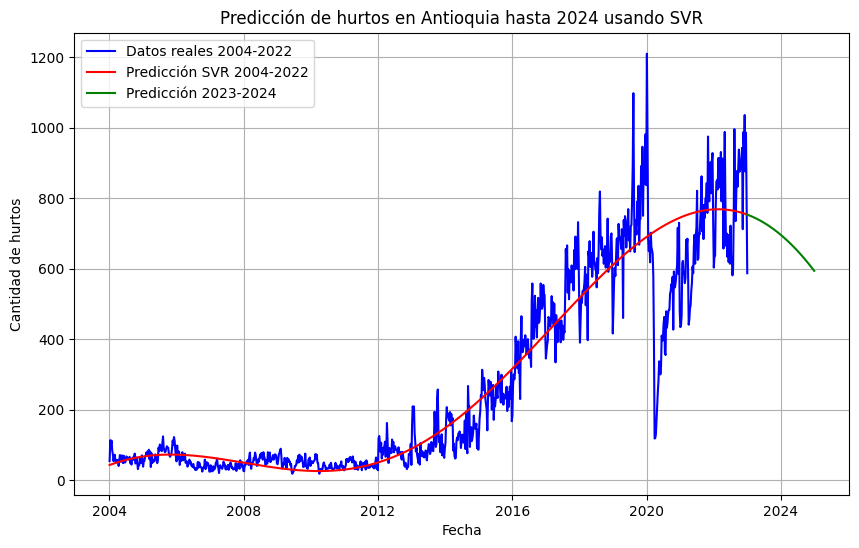

In [ ]:
# Modificar la consulta para obtener datos de 2004 a 2022
hurtos_antioquia = hurtos.query("fecha_hecho >= '2004-01-01' and fecha_hecho <= '2022-12-31' and departamento == 'ANTIOQUIA'").sort_values("fecha_hecho")

# Asegurarse de que 'fecha_hecho' esté en el formato correcto
hurtos_antioquia['fecha_hecho'] = pd.to_datetime(hurtos_antioquia['fecha_hecho'])

# Agrupar por semana para obtener datos más manejables
hurtos_por_semana = hurtos_antioquia.resample('W', on='fecha_hecho').sum()

# Restablecer el índice para que 'fecha_hecho' sea una columna normal
hurtos_por_semana = hurtos_por_semana.reset_index()

# Convertir las fechas a números ordinales para que el modelo pueda procesarlas
X = hurtos_por_semana["fecha_hecho"].map(lambda date: date.toordinal()).values.reshape(-1, 1)
y = hurtos_por_semana["cantidad"].values  # Asegurar que y es unidimensional

# Escalar los datos (esto es importante para SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)  # Escalar X
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()  # Escalar y y luego aplanarlo

# Crear el modelo de SVR con un kernel radial (RBF)
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_scaled, y_scaled)

# Crear nuevas fechas para predecir hasta el 2024
nuevas_fechas = pd.date_range(start="2023-01-01", end="2024-12-31", freq='W')

# Convertir las nuevas fechas a ordinales y escalar
X_nuevas_fechas = nuevas_fechas.map(lambda date: date.toordinal()).values.reshape(-1, 1)
X_nuevas_fechas_scaled = scaler_X.transform(X_nuevas_fechas)

# Hacer las predicciones
y_pred_scaled = svr_model.predict(X_nuevas_fechas_scaled)

# Desescalar las predicciones
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(hurtos_por_semana["fecha_hecho"], y, color='blue', label='Datos reales 2004-2022')
plt.plot(hurtos_por_semana["fecha_hecho"], scaler_y.inverse_transform(svr_model.predict(X_scaled).reshape(-1, 1)), color='red', label='Predicción SVR 2004-2022')
plt.plot(nuevas_fechas, y_pred, color='green', label='Predicción 2023-2024')
plt.title('Predicción de hurtos en Antioquia hasta 2024 usando SVR')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de hurtos')
plt.legend()
plt.grid(True)
plt.show()
